In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Charger les données
data = pd.read_csv('C:/Users/EBM/Desktop/projet_ML/projet2.csv')

# Aperçu des données
print("Shape des données:", data.shape)
print("Valeurs manquantes par colonne:")
print(data.isnull().sum())


Shape des données: (41188, 23)
Valeurs manquantes par colonne:
age                  0
job                  0
marital              0
education         4118
default           4118
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays             4118
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                 4118
cons.idx             0
period               0
dtype: int64


In [3]:
# Déplacer la colonne cible 'y' en dernière position
y_column = data.pop('y')  # Supprime 'y' du DataFrame et la stocke dans y_column
data['y'] = y_column      # Ajoute 'y' en tant que dernière colonne
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,cons.idx,period,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.955546,5191.0,-3421.3816,may_mon,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.657336,5191.0,-3421.3816,may_mon,no
2,37,services,married,high.school,NaN,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.448917,5191.0,-3421.3816,may_mon,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.474776,5191.0,-3421.3816,may_mon,no
4,117,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.862300,5191.0,-3421.3816,may_mon,no


In [4]:
# Renommer les colonnes pour une meilleure compréhension
data.rename(columns={
    'age': 'client_age',
    'job': 'job_type',
    'marital': 'marital_status',
    'education': 'education_level',
    'default': 'credit_default',
    'housing': 'housing_loan',
    'loan': 'personal_loan',
    'contact': 'contact_type',
    'month': 'last_contact_month',
    'day_of_week': 'last_contact_day',
    'duration': 'contact_duration',
    'campaign': 'contacts_campaign',
    'pdays': 'days_since_previous_contact',
    'previous': 'previous_contacts',
    'poutcome': 'previous_outcome',
    'emp.var.rate': 'employment_variation_rate',
    'cons.price.idx': 'consumer_price_index',
    'cons.conf.idx': 'consumer_confidence_index',
    'euribor3m': 'euribor_3_months_rate',
    'nr.employed': 'number_employees'
   
}, inplace=True)

In [5]:
# Aperçu des données
print("Shape des données:", data.shape)
print("Valeurs manquantes par colonne:")
print(data.isnull().sum())

Shape des données: (41188, 23)
Valeurs manquantes par colonne:
client_age                        0
job_type                          0
marital_status                    0
education_level                4118
credit_default                 4118
housing_loan                      0
personal_loan                     0
contact_type                      0
last_contact_month                0
last_contact_day                  0
contact_duration                  0
contacts_campaign                 0
days_since_previous_contact    4118
previous_contacts                 0
previous_outcome                  0
employment_variation_rate         0
consumer_price_index              0
consumer_confidence_index         0
euribor_3_months_rate             0
number_employees                  0
cons.idx                          0
period                            0
y                              4118
dtype: int64


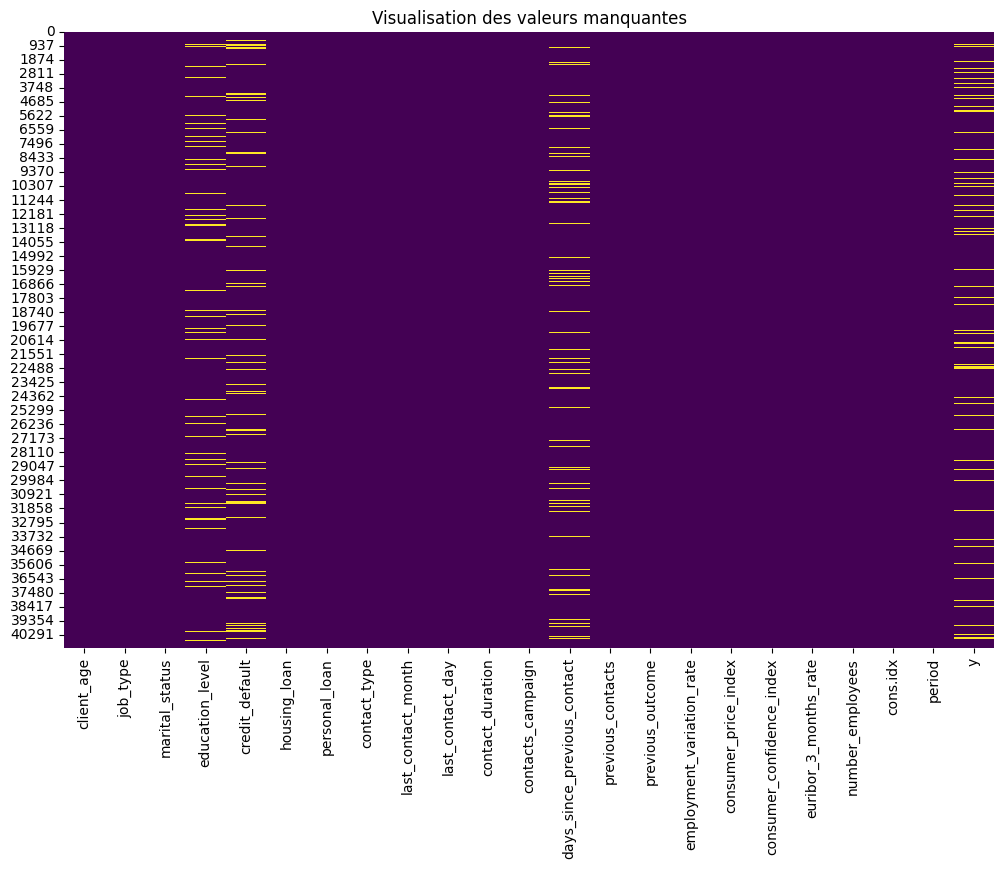

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurer la taille de la figure
plt.figure(figsize=(12, 8))

# Afficher la heatmap des valeurs manquantes
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisation des valeurs manquantes")
plt.show()

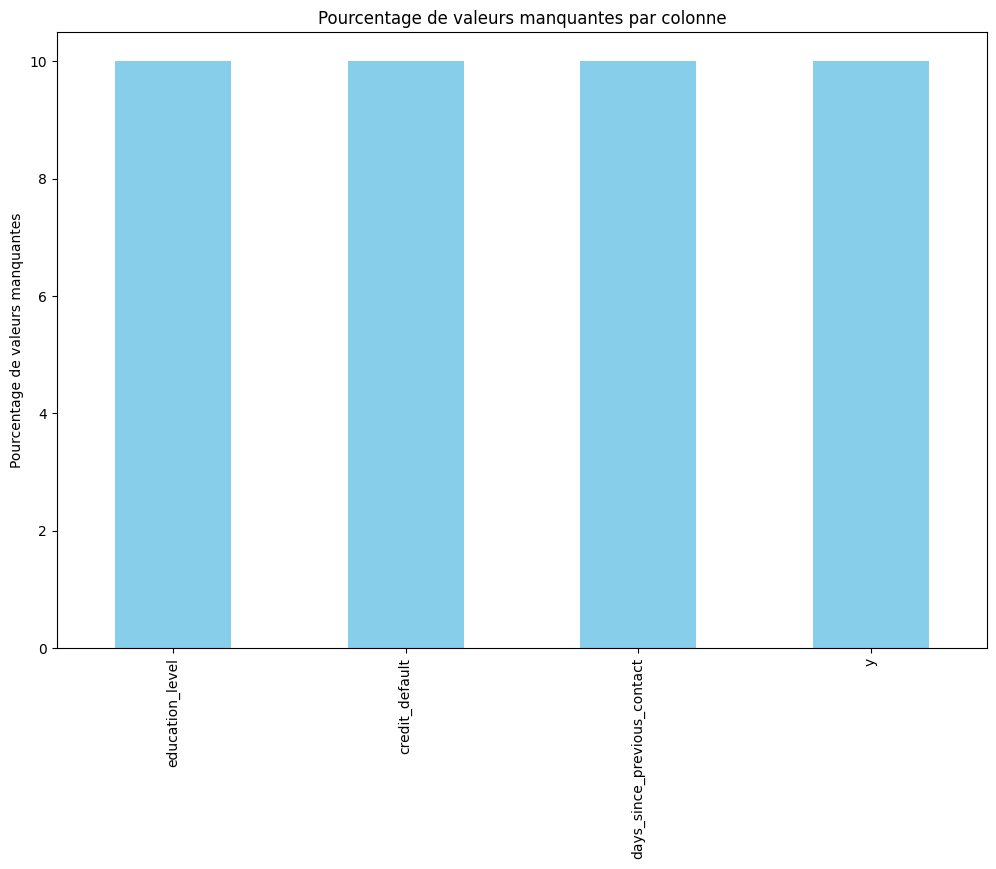

In [7]:
# Calculer le pourcentage de valeurs manquantes par colonne
missing_percentage = data.isnull().mean() * 100

# Filtrer pour les colonnes ayant des valeurs manquantes
missing_percentage = missing_percentage[missing_percentage > 0]

# Tracer le diagramme en barres
missing_percentage.plot(kind="bar", figsize=(12, 8), color="skyblue")
plt.ylabel("Pourcentage de valeurs manquantes")
plt.title("Pourcentage de valeurs manquantes par colonne")
plt.show()

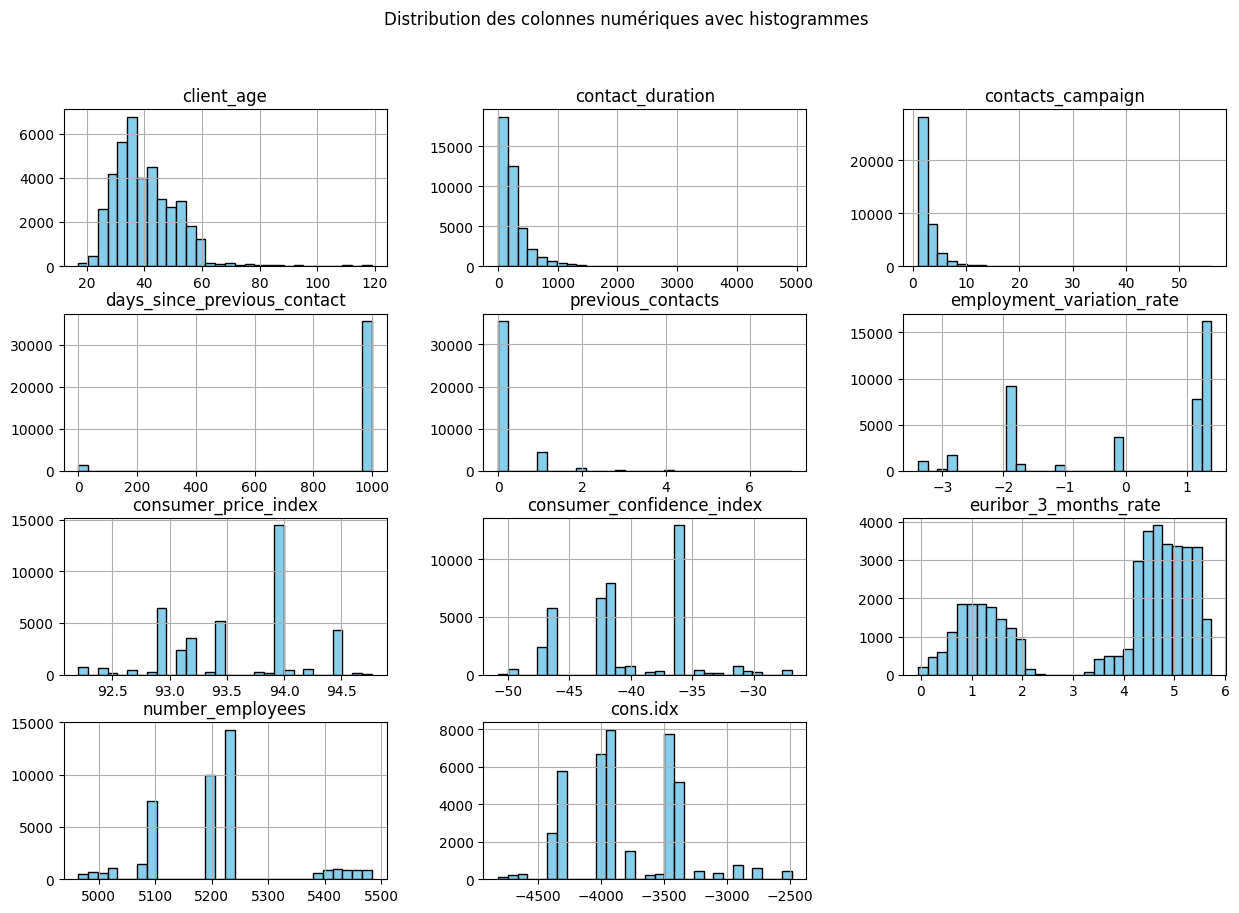

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un histogramme pour chaque colonne numérique
data.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution des colonnes numériques avec histogrammes")
plt.show()


In [9]:
from sklearn.impute import KNNImputer

# Sélection des colonnes numériques pour l'imputation avec KNN
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
imputer = KNNImputer(n_neighbors=5)
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Imputation des valeurs manquantes pour les colonnes non numériques en utilisant le mode
non_numeric_cols = data.select_dtypes(include=['object']).columns
for col in non_numeric_cols:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

# Vérification des valeurs manquantes après imputation
missing_values_after_imputation = data.isnull().sum()
missing_values_after_imputation

C:\Users\EBM\AppData\Local\Temp\ipykernel_15916\4034384478.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)


client_age                     0
job_type                       0
marital_status                 0
education_level                0
credit_default                 0
housing_loan                   0
personal_loan                  0
contact_type                   0
last_contact_month             0
last_contact_day               0
contact_duration               0
contacts_campaign              0
days_since_previous_contact    0
previous_contacts              0
previous_outcome               0
employment_variation_rate      0
consumer_price_index           0
consumer_confidence_index      0
euribor_3_months_rate          0
number_employees               0
cons.idx                       0
period                         0
y                              0
dtype: int64

In [10]:
# Pour chaque colonne, afficher les informations
for col in data.columns:
    print(f"\n--- Aperçu de la colonne : {col} ---")
    
    # Afficher le type de la colonne
    print(f"Type de la colonne : {data[col].dtype}")
    
    # Afficher les valeurs uniques (pour les variables catégoriques)
    print(f"Valeurs uniques dans '{col}':")
    print(data[col].unique())
    
    # Afficher le nombre de valeurs uniques
    print(f"Nombre de valeurs uniques dans '{col}': {data[col].nunique()}")
    
    # Afficher le nombre de valeurs manquantes
    print(f"Nombre de valeurs manquantes dans '{col}': {data[col].isnull().sum()}")
    
    # Si la colonne est numérique, afficher les statistiques descriptives
    if data[col].dtype in ['int64', 'float64']:
        print(f"Statistiques descriptives pour '{col}':")
        print(data[col].describe())
    
    print("-" * 40)  # Séparateur pour lisibilité



--- Aperçu de la colonne : client_age ---
Type de la colonne : float64
Valeurs uniques dans 'client_age':
[ 56.  57.  37.  40. 117.  45.  59.  41.  24.  25.  29.  35.  54.  46.
  50.  39.  30.  55. 108.  49.  34.  52. 111.  32.  38.  44.  42.  60.
  53.  47.  51.  48.  33.  84.  31.  43.  58.  36.  83. 119.  28. 110.
  27. 101.  26.  97.  22. 107. 112.  23.  82.  94. 100.  90.  85. 109.
  89.  20. 118.  99. 105.  91.  95.  92. 103.  21.  80.  86.  88. 102.
 104.  93.  96. 113. 106. 115.  81.  98.  87. 116.  19. 114.  18.  70.
  61.  66.  76.  67.  77.  68.  75.  63.  73.  62.  65.  72.  64.  71.
  69.  78.  79.  74.  17.]
Nombre de valeurs uniques dans 'client_age': 103
Nombre de valeurs manquantes dans 'client_age': 0
Statistiques descriptives pour 'client_age':
count    41188.000000
mean        40.436559
std         11.949737
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max        119.000000
Name: client_age, dtype: float64
----------------

[5191.         5401.70247449 5406.94491377 ... 5391.36214893 5426.11562029
 5458.2852591 ]
Nombre de valeurs uniques dans 'number_employees': 5011
Nombre de valeurs manquantes dans 'number_employees': 0
Statistiques descriptives pour 'number_employees':
count    41188.000000
mean      5199.506688
std        110.729797
min       4963.600000
25%       5099.100000
50%       5195.800000
75%       5228.100000
max       5483.747094
Name: number_employees, dtype: float64
----------------------------------------

--- Aperçu de la colonne : cons.idx ---
Type de la colonne : float64
Valeurs uniques dans 'cons.idx':
[-3421.3816 -3948.637  -4010.2986 -3373.3284 -3789.4392 -3914.4
 -4257.5004 -4642.15   -4383.8325 -4291.6566 -3792.8904 -3106.9584
 -2895.1114 -2752.8942 -2486.3939 -2788.7349 -3059.529  -3249.2412
 -3243.7154 -3755.04   -3743.389  -3796.8645 -3601.2341 -3532.4625
 -4682.7495 -4814.1636]
Nombre de valeurs uniques dans 'cons.idx': 26
Nombre de valeurs manquantes dans 'cons.idx': 0
Stat

In [11]:
age_lower = data['client_age'].quantile(0.01)  # 1er centile
age_upper = data['client_age'].quantile(0.99)  # 99e centile
data['client_age'] = np.clip(data['client_age'], age_lower, age_upper)



In [12]:
# Fonction pour remplacer 'unknown' par la modalité la plus fréquente si la proportion d'unknown est inférieure à 10%
def replace_unknown_by_mode(data, columns):
    for col in columns:
        if col in data.columns:  # Vérifier que la colonne existe
            unknown_ratio = (data[col] == 'unknown').mean()
            if unknown_ratio < 0.1:  # Si <10%, remplacez par la modalité la plus fréquente
                most_frequent_value = data[col].mode()[0]  # Trouver la modalité la plus fréquente
                data[col] = data[col].replace('unknown', most_frequent_value)
        else:
            print(f"Colonne '{col}' non trouvée dans les données.")

# Liste des colonnes correspondant aux types de travail
job_type_columns = [
    'job_type_blue_collar', 'job_type_entrepreneur', 'job_type_housemaid',
    'job_type_management', 'job_type_retired', 'job_type_self-employed',
    'job_type_services', 'job_type_student', 'job_type_technician', 'job_type_unemployed'
]

# Remplacer 'unknown' par la modalité la plus fréquente pour les colonnes de type de travail
replace_unknown_by_mode(data, job_type_columns)

# Liste des colonnes pour l'état civil
marital_status_columns = ['marital_status_married', 'marital_status_single']

# Remplacer 'unknown' par la modalité la plus fréquente pour l'état civil
replace_unknown_by_mode(data, marital_status_columns)

# Liste des colonnes pour le niveau d'éducation
education_level_columns = [
    'education_level_basic.6y', 'education_level_basic.9y', 'education_level_high.school',
    'education_level_illiterate', 'education_level_professional.course', 'education_level_university.degree'
]

# Remplacer 'unknown' par la modalité la plus fréquente pour le niveau d'éducation
replace_unknown_by_mode(data, education_level_columns)

# Afficher les premières lignes du DataFrame après traitement
print(data.head())




Colonne 'job_type_blue_collar' non trouvée dans les données.
Colonne 'job_type_entrepreneur' non trouvée dans les données.
Colonne 'job_type_housemaid' non trouvée dans les données.
Colonne 'job_type_management' non trouvée dans les données.
Colonne 'job_type_retired' non trouvée dans les données.
Colonne 'job_type_self-employed' non trouvée dans les données.
Colonne 'job_type_services' non trouvée dans les données.
Colonne 'job_type_student' non trouvée dans les données.
Colonne 'job_type_technician' non trouvée dans les données.
Colonne 'job_type_unemployed' non trouvée dans les données.
Colonne 'marital_status_married' non trouvée dans les données.
Colonne 'marital_status_single' non trouvée dans les données.
Colonne 'education_level_basic.6y' non trouvée dans les données.
Colonne 'education_level_basic.9y' non trouvée dans les données.
Colonne 'education_level_high.school' non trouvée dans les données.
Colonne 'education_level_illiterate' non trouvée dans les données.
Colonne 'educ

In [13]:
data['days_since_previous_contact'] = data['days_since_previous_contact'].replace(999, -1)
data['days_since_previous_contact'] = (data['days_since_previous_contact'] - data['days_since_previous_contact'].min()) / \
                                      (data['days_since_previous_contact'].max() - data['days_since_previous_contact'].min())


In [14]:
# Conversion en binaire
data['y'] = data['y'].map({'yes': 1, 'no': 0})


In [15]:
from sklearn.preprocessing import OneHotEncoder

# Encodage One-Hot
categorical_cols = ['job_type', 'marital_status', 'education_level', 'credit_default', 'housing_loan', 'personal_loan', 'contact_type', 'last_contact_month', 'last_contact_day', 'previous_outcome']
encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]),
                            columns=encoder.get_feature_names_out(categorical_cols))

# Ajouter les colonnes encodées au dataset et supprimer les colonnes d'origine
data = pd.concat([data.drop(columns=categorical_cols), encoded_cols], axis=1)


In [16]:
print(data['y'].value_counts())

y
0    37000
1     4188
Name: count, dtype: int64


In [21]:
# Importations nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Séparer les caractéristiques (X) et la cible (y)
X = data.drop(columns=['y'])
y = data['y']

# Identifier les colonnes catégoriques
categorical_cols = X.select_dtypes(include=['object']).columns

# Appliquer One-Hot Encoding aux colonnes catégoriques
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Diviser en ensemble d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Vérification de la distribution des classes avant SMOTE
print("Distribution des classes avant SMOTE sur l'ensemble d'entraînement :")
print(pd.Series(y_train).value_counts())

# Appliquer SMOTE pour oversampling uniquement sur l'ensemble d'entraînement
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Vérification de la distribution après SMOTE
print("Distribution des classes après SMOTE sur l'ensemble d'entraînement :")
print(pd.Series(y_train_resampled).value_counts())

# Sauvegarder les données sur-échantillonnées (facultatif)
data_resampled = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train.columns),
                            pd.DataFrame(y_train_resampled, columns=['y'])], axis=1)
data_resampled.to_csv('dataset_cleaned.csv', index=False)

print("Dataset équilibré (train) sauvegardé dans 'dataset_cleaned.csv'")


Distribution des classes avant SMOTE sur l'ensemble d'entraînement :
y
0    25899
1     2932
Name: count, dtype: int64


c:\Users\EBM\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\EBM\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Distribution des classes après SMOTE sur l'ensemble d'entraînement :
y
0    25899
1    25899
Name: count, dtype: int64
Dataset équilibré (train) sauvegardé dans 'dataset_cleaned.csv'


In [22]:
# Vérification des valeurs manquantes dans le dataset nettoyé
print("Valeurs manquantes par colonne après nettoyage:")
print(data_resampled.isnull().sum())  # ou data.isnull().sum() si vous travaillez sur le dataset avant SMOTE


Valeurs manquantes par colonne après nettoyage:
client_age                     0
contact_duration               0
contacts_campaign              0
days_since_previous_contact    0
previous_contacts              0
                              ..
period_sep_mon                 0
period_sep_thu                 0
period_sep_tue                 0
period_sep_wed                 0
y                              0
Length: 104, dtype: int64


In [23]:
# Affichage des statistiques descriptives pour les colonnes numériques après nettoyage
print("Statistiques descriptives des colonnes numériques :")
print(data_resampled.describe())  # ou data.describe() pour les données avant SMOTE


Statistiques descriptives des colonnes numériques :
         client_age  contact_duration  contacts_campaign  \
count  51798.000000      51798.000000       51798.000000   
mean      40.577027        387.485296           2.337118   
std       11.889209        358.362578           2.255595   
min       23.000000          0.000000           1.000000   
25%       32.000000        147.000000           1.000000   
50%       38.000000        268.000000           1.976605   
75%       47.000000        523.758152           2.954201   
max       86.000000       4918.000000          43.000000   

       days_since_previous_contact  previous_contacts  \
count                 51798.000000       51798.000000   
mean                      0.020153           0.314681   
std                       0.111890           0.637341   
min                       0.000000           0.000000   
25%                       0.000000           0.000000   
50%                       0.000000           0.000000   
75%     

In [24]:
# Vérification des types de données après One-Hot Encoding
print("Types des colonnes après One-Hot Encoding:")
print(data_resampled.dtypes)  # ou data.dtypes si vous travaillez avant SMOTE


Types des colonnes après One-Hot Encoding:
client_age                     float64
contact_duration               float64
contacts_campaign              float64
days_since_previous_contact    float64
previous_contacts              float64
                                ...   
period_sep_mon                    bool
period_sep_thu                    bool
period_sep_tue                    bool
period_sep_wed                    bool
y                                int64
Length: 104, dtype: object


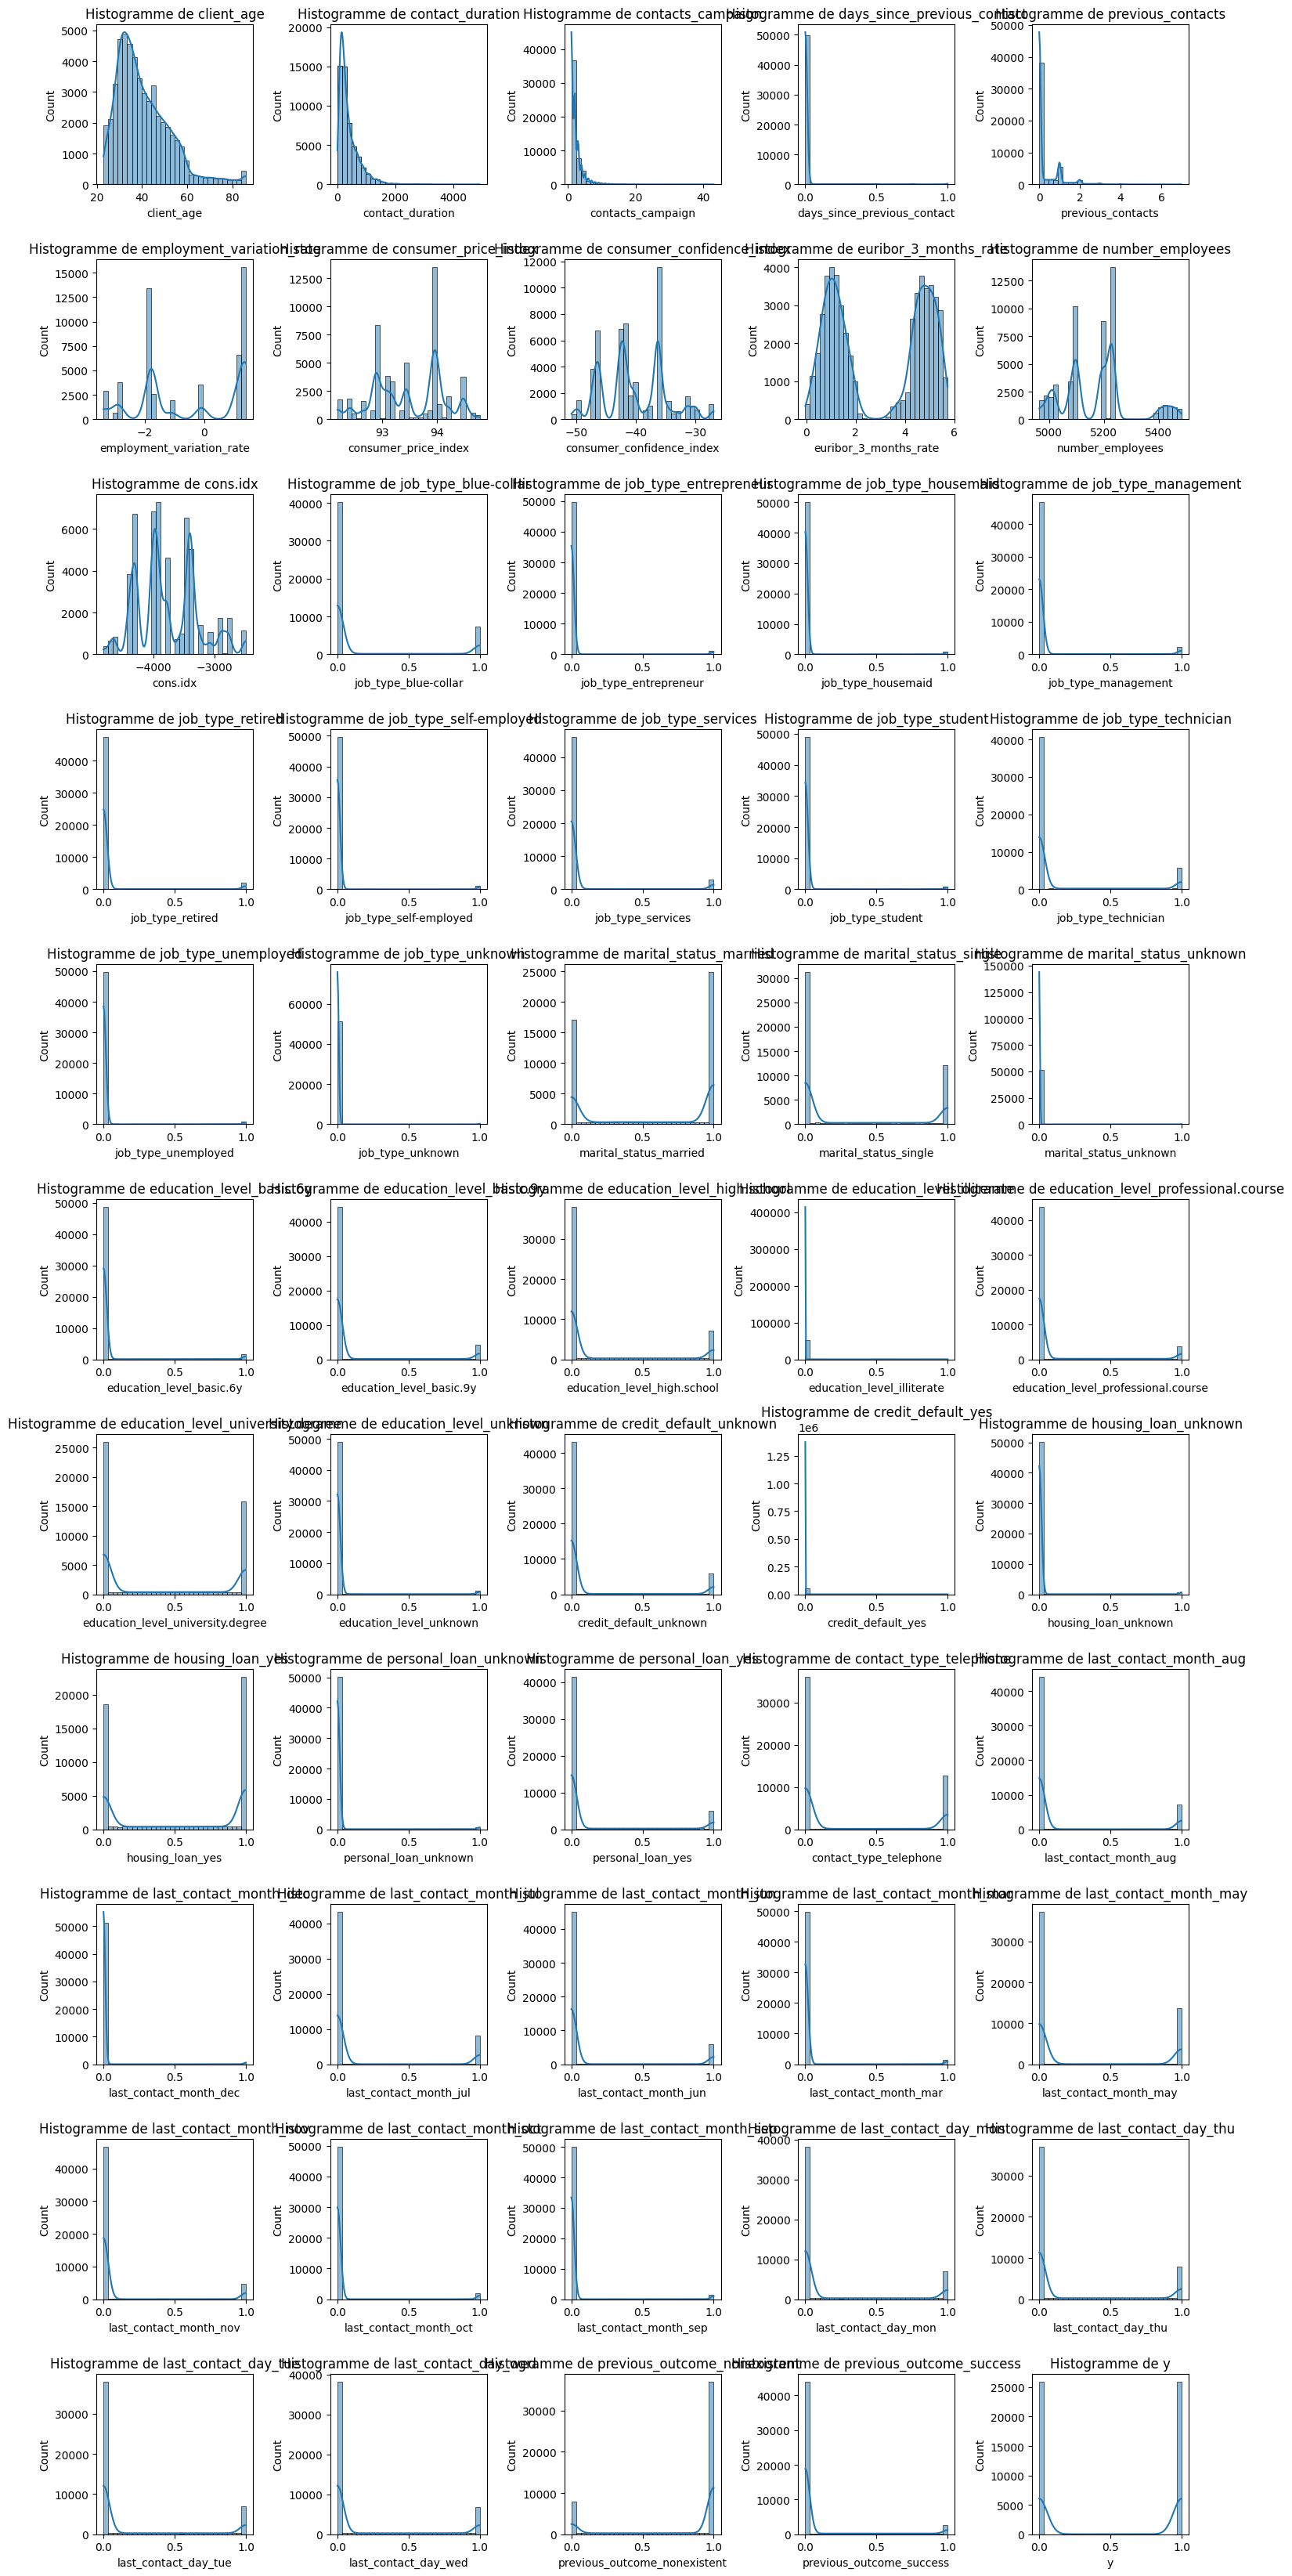

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Afficher un histogramme pour chaque colonne numérique
numerical_cols = data_resampled.select_dtypes(include=['float64', 'int64']).columns

# Calculer le nombre de sous-graphiques nécessaires (lignes et colonnes)
num_plots = len(numerical_cols)
cols = 5  # Choisissez un nombre de colonnes (ici 5)
rows = (num_plots // cols) + (1 if num_plots % cols != 0 else 0)  # Calculer le nombre de lignes

plt.figure(figsize=(15, 3 * rows))  # Ajuster la hauteur en fonction du nombre de lignes
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)  # Ajuster le nombre de lignes et de colonnes
    sns.histplot(data_resampled[col], kde=True, bins=30)
    plt.title(f'Histogramme de {col}')
    plt.tight_layout()
plt.show()


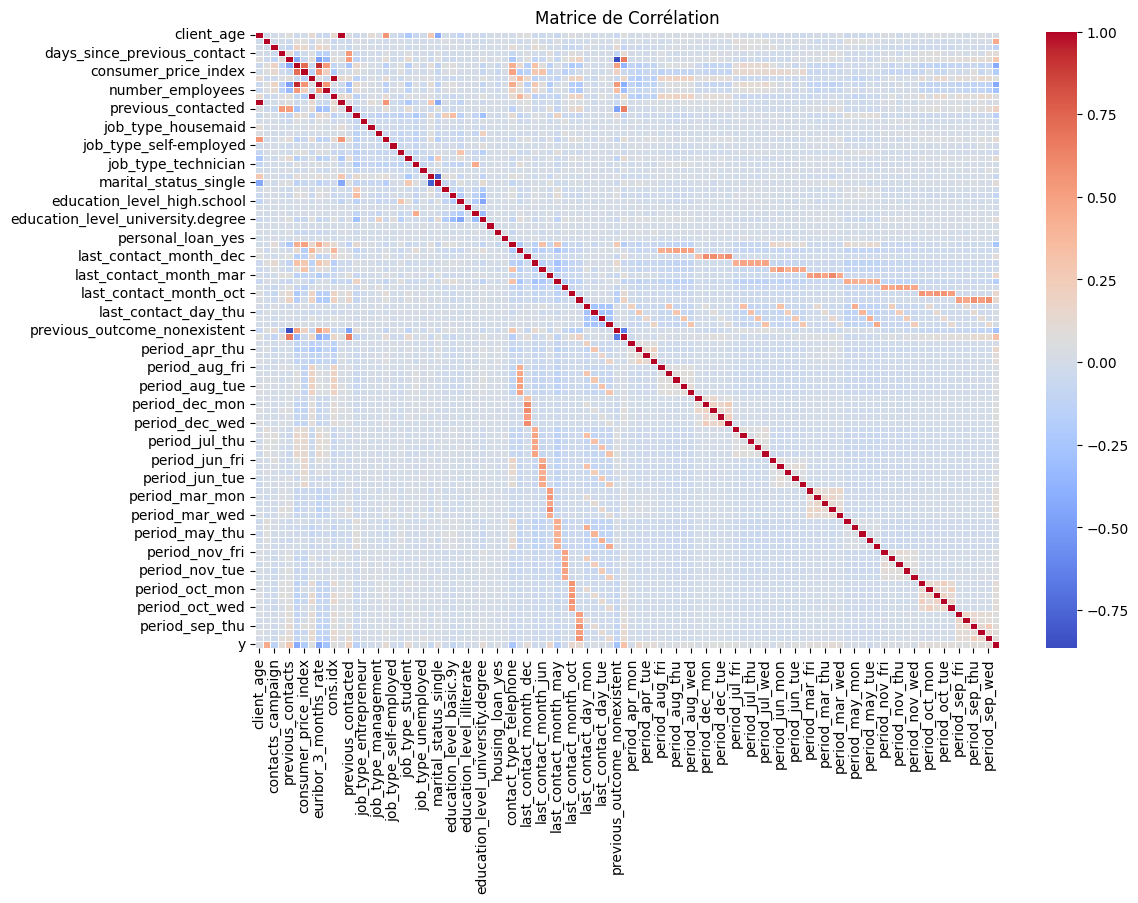

In [ ]:
# 3. Afficher la matrice de corrélation entre les variables numériques
correlation_matrix = data_resampled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

In [26]:
# Afficher les premières lignes du dataset nettoyé
print("Aperçu des premières lignes du dataset nettoyé :")
print(data_resampled.head())


Aperçu des premières lignes du dataset nettoyé :
   client_age  contact_duration  contacts_campaign  \
0        33.0              69.0                1.0   
1        25.0             206.0                1.0   
2        25.0             120.0                1.0   
3        57.0             231.0                3.0   
4        59.0             216.0                3.0   

   days_since_previous_contact  previous_contacts  employment_variation_rate  \
0                          0.0                0.0                       -1.8   
1                          0.0                0.0                        1.4   
2                          0.0                0.0                       -1.8   
3                          0.0                0.0                        1.4   
4                          0.0                0.0                        1.4   

   consumer_price_index  consumer_confidence_index  euribor_3_months_rate  \
0                92.893                      -46.2               1.5

In [27]:
# Capping pour corriger les valeurs aberrantes (plage d'âge entre 18 et 100 ans)
data_resampled['client_age'] = data_resampled['client_age'].apply(lambda x: np.clip(x, 18, 100))

# Vérifier les premières lignes du dataset après nettoyage
print(data_resampled[['client_age']].head())


   client_age
0        33.0
1        25.0
2        25.0
3        57.0
4        59.0


In [28]:
# Afficher les premières lignes du dataset nettoyé
print("Aperçu des premières lignes du dataset nettoyé :")
print(data_resampled.head())

Aperçu des premières lignes du dataset nettoyé :
   client_age  contact_duration  contacts_campaign  \
0        33.0              69.0                1.0   
1        25.0             206.0                1.0   
2        25.0             120.0                1.0   
3        57.0             231.0                3.0   
4        59.0             216.0                3.0   

   days_since_previous_contact  previous_contacts  employment_variation_rate  \
0                          0.0                0.0                       -1.8   
1                          0.0                0.0                        1.4   
2                          0.0                0.0                       -1.8   
3                          0.0                0.0                        1.4   
4                          0.0                0.0                        1.4   

   consumer_price_index  consumer_confidence_index  euribor_3_months_rate  \
0                92.893                      -46.2               1.5

In [29]:
print(data_resampled.dtypes)


client_age                     float64
contact_duration               float64
contacts_campaign              float64
days_since_previous_contact    float64
previous_contacts              float64
                                ...   
period_sep_mon                    bool
period_sep_thu                    bool
period_sep_tue                    bool
period_sep_wed                    bool
y                                int64
Length: 104, dtype: object
